In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [4]:
#X_train.head()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Label: [6]


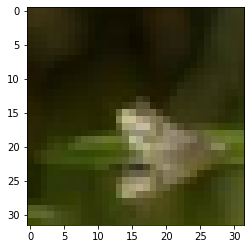

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[25000]))
plt.imshow(X_train[25000],cmap='gray')

In [7]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 207s 133ms/step - loss: 1.5616 - accuracy: 0.4281 - val_loss: 1.3355 - val_accuracy: 0.5193
Epoch 2/10
1563/1563 [==============================] - 207s 133ms/step - loss: 1.2445 - accuracy: 0.5551 - val_loss: 1.1411 - val_accuracy: 0.6010
Epoch 3/10
1563/1563 [==============================] - 209s 133ms/step - loss: 1.0804 - accuracy: 0.6169 - val_loss: 0.9977 - val_accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 209s 134ms/step - loss: 0.9629 - accuracy: 0.6606 - val_loss: 0.9372 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 210s 135ms/step - loss: 0.8883 - accuracy: 0.6892 - val_loss: 0.8715 - val_accuracy: 0.6956
Epoch 6/10
1563/1563 [==============================] - 210s 134ms/step - loss: 0.8416 - accuracy: 0.7046 - val_loss: 0.9109 - val_accuracy: 0.6917
Epoch 7/10
1563/1563 [==============================] - 210s 134ms/step - loss: 0.8014 - accuracy: 0.7170 - val_

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.8048 - accuracy: 0.7236


[0.8048160076141357, 0.7235999703407288]